# Inicialización

Importamos las librerías necesarias.

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#semilla para poder replicar
semilla = 42
np.random.seed(semilla)

Creamos el dataset juntando todos los archivos CSV.

In [ ]:
carpeta = "C:\\Users\\User\\Desktop\\TFM\\DATOS"

dataframes = []

#iterar sobre los csv de la carpeta
for archivo in os.listdir(carpeta):
    ruta_completa = os.path.join(carpeta, archivo)
    #leer el CSV y añadirlo a la lista
    df_sub = pd.read_csv(ruta_completa, header=1).iloc[3:, :]
    #filtrar las columnas
    df_filt = df_sub
    dataframes.append(df_filt)

#fusionar todos los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True) 
pd.set_option('display.max_columns', None)

Nos quedamos solo con las variables de refrigeradores.

In [ ]:
columnas_a_eliminar = [col for col in df.columns if col.startswith('Central') 
                       or col.startswith('Name') or col.startswith('Analizador') 
                       or col.startswith('Subenfriador')]

df = df.drop(columnas_a_eliminar, axis=1)
df.head(1)

,M.Frutas B -6: --- Temp. Enganche,M.Frutas B -6: --- Temp. Corte,M.Frutas B -6: u21 Recalentam.,M.Frutas B -6: u11 Tiempo Desesc.,M.Frutas B -6: u17 Temperatura Aire,M.Frutas B -6: u26 Temp Evap. Te,M.Frutas B -6: u20 S2 Temperatura,M.Frutas B -6: u16 S4 Temperatura Aire,M.Frutas B -6: u23 %Apert. VEE %,M.Frutas B -6: u25 Presion Evaporac. Pe,M.Frutas B -6: --- Condicion Regulac.,M.Frutas B -6: u00 Estado Control,M.Frutas B -6: u09 S5 Temperatura,M.4 gama -2: --- Temp. Enganche,M.4 gama -2: --- Temp. Corte,M.4 gama -2: u00 Estado Control,M.4 gama -2: u21 Recalentam.,M.4 gama -2: u11 Tiempo Desesc.,M.4 gama -2: u17 Temperatura Aire,M.4 gama -2: u26 Temp Evap. Te,M.4 gama -2: u20 S2 Temperatura,M.4 gama -2: u16 S4 Temperatura Aire,M.4 gama -2: u23 %Apert. VEE %,M.4 gama -2: u25 Presion Evaporac. Pe,M.4 gama -1: --- Temp. Enganche,M.4 gama -1: --- Temp. Corte,M.4 gama -1: u21 Recalentam.,M.4 gama -1: u11 Tiempo Desesc.,M.4 gama -1: u00 Estado Control,M.4 gama -1: u17 Temperatura Aire,M.4 gama -1: u26 Temp Evap. Te,M.4 gama -1: u20 S2 Temperatura,M.4 gama -1: u16 S4 Temperatura Aire,M.4 gama -1: u23 %Apert. VEE %,M.4 gama -1: u25 Presion Evaporac. Pe,M.4 gama -1: u09 S5 Temperatura,M.Frutas A -3: --- Temp. Enganche,M.Frutas A -3: --- Temp. Corte,M.Frutas A -3: u21 Recalentam.,M.Frutas A -3: u11 Tiempo Desesc.,M.Frutas A -3: u00 Estado Control,M.Frutas A -3: u17 Temperatura Aire,M.Frutas A -3: u26 Temp Evap. Te,M.Frutas A -3: u20 S2 Temperatura,M.Frutas A -3: u16 S4 Temperatura Aire,M.Frutas A -3: u23 %Apert. VEE %,M.Frutas A -3: u25 Presion Evaporac. Pe,M.Frutas A -3: u09 S5 Temperatura,M.Frutas A -4: --- Temp. Enganche,M.Frutas A -4: --- Temp. Corte,M.Frutas A -4: u21 Recalentam.,M.Frutas A -4: u11 Tiempo Desesc.,M.Frutas A -4: u00 Estado Control,M.Frutas A -4: u17 Temperatura Aire,M.Frutas A -4: u26 Temp Evap. Te,M.Frutas A -4: u20 S2 Temperatura,M.Frutas A -4: u16 S4 Temperatura Aire,M.Frutas A -4: u23 %Apert. VEE %,M.Frutas A -4: u25 Presion Evaporac. Pe,M.Frutas B -7: --- Temp. Enganche,M.Frutas B -7: --- Temp. Corte,M.Frutas B -7: u21 Recalentam.,M.Frutas B -7: u11 Tiempo Desesc.,M.Frutas B -7: u00 Estado Control,M.Frutas B -7: u17 Temperatura Aire,M.Frutas B -7: u26 Temp Evap. Te,M.Frutas B -7: u20 S2 Temperatura,M.Frutas B -7: u16 S4 Temperatura Aire,M.Frutas B -7: u23 %Apert. VEE %,M.Frutas B -7: u25 Presion Evaporac. Pe,M.Frutas B -7: u09 S5 Temperatura,M.Pescado -9: --- Temp. Enganche,M.Pescado -9: --- Temp. Corte,M.Pescado -9: u21 Recalentam.,M.Pescado -9: u11 Tiempo Desesc.,M.Pescado -9: u00 Estado Control,M.Pescado -9: u17 Temperatura Aire,M.Pescado -9: u26 Temp Evap. Te,M.Pescado -9: u20 S2 Temperatura,M.Pescado -9: u16 S4 Temperatura Aire,M.Pescado -9: u23 %Apert. VEE %,M.Pescado -9: u25 Presion Evaporac. Pe,M.Pescado -9: u09 S5 Temperatura,M.Pescado -10: --- Temp. Enganche,M.Pescado -10: --- Temp. Corte,M.Pescado -10: u21 Recalentam.,M.Pescado -10: u11 Tiempo Desesc.,M.Pescado -10: u00 Estado Control,M.Pescado -10: u17 Temperatura Aire,M.Pescado -10: u26 Temp Evap. Te,M.Pescado -10: u20 S2 Temperatura,M.Pescado -10: u16 S4 Temperatura Aire,M.Pescado -10: u23 %Apert. VEE %,M.Pescado -10: u25 Presion Evaporac. Pe,M.Pescado -10: u09 S5 Temperatura,M.Pescado -11: --- Temp. Enganche,M.Pescado -11: --- Temp. Corte,M.Pescado -11: u21 Recalentam.,M.Pescado -11: u11 Tiempo Desesc.,M.Pescado -11: u00 Estado Control,M.Pescado -11: u17 Temperatura Aire,M.Pescado -11: u26 Temp Evap. Te,M.Pescado -11: u20 S2 Temperatura,M.Pescado -11: u16 S4 Temperatura Aire,M.Pescado -11: u23 %Apert. VEE %,M.Pescado -11: u25 Presion Evaporac. Pe,M.Refrig 1A -14: --- Temp. Enganche,M.Refrig 1A -14: --- Temp. Corte,M.Refrig 1A -14: u21 Recalentam.,M.Refrig 1A -14: u11 Tiempo Desesc.,M.Refrig 1A -14: u00 Estado Control,M.Refrig 1A -14: u17 Temperatura Aire,M.Refrig 1A -14: u26 Temp Evap. Te,M.Refrig 1A -14: u20 S2 Temperatura,M.Refrig 1A -14: u16 S4 Temperatura Aire,M.Refrig 1A -14: u23 %Apert. VEE %,M.Refrig 1A -14: u25 Presion Evaporac. Pe,M.R

# Preprocesado

Pasamos los strings 'Missing' y 'Offln' a NANs y convertimos las variables a tipo numérico, ya que son de tipo object.

In [ ]:
df = df.replace('Missing', np.nan)
df = df.replace('Offln', np.nan)

#cambiar a tipo numerico
columnas_object = df.select_dtypes(include=['object']).columns

for columna in columnas_object:
    df[columna] = pd.to_numeric(df[columna])

Reducimos la frecuencia de los registros de 2 minutos a 10 minutos.

In [ ]:
#crear un índice de agrupación cada 10 minutos (5 filas)
df['Group'] = df.index // 5 

#calcular la media o moda solo para las variables que cambian cada 2 minutos; para el resto tomar el último valor.
df_remuestreo = df.groupby('Group', as_index=False).last()
df = df_remuestreo.drop(['Group'], axis=1)
df.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_10584\2201224676.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Group'] = df.index // 5
C:\Users\User\AppData\Local\Temp\ipykernel_10584\2201224676.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_remuestreo = df.groupby('Group', as_index=False).last()


,M.Frutas B -6: --- Temp. Enganche,M.Frutas B -6: --- Temp. Corte,M.Frutas B -6: u21 Recalentam.,M.Frutas B -6: u11 Tiempo Desesc.,M.Frutas B -6: u17 Temperatura Aire,M.Frutas B -6: u26 Temp Evap. Te,M.Frutas B -6: u20 S2 Temperatura,M.Frutas B -6: u16 S4 Temperatura Aire,M.Frutas B -6: u23 %Apert. VEE %,M.Frutas B -6: u25 Presion Evaporac. Pe,M.Frutas B -6: --- Condicion Regulac.,M.Frutas B -6: u00 Estado Control,M.Frutas B -6: u09 S5 Temperatura,M.4 gama -2: --- Temp. Enganche,M.4 gama -2: --- Temp. Corte,M.4 gama -2: u00 Estado Control,M.4 gama -2: u21 Recalentam.,M.4 gama -2: u11 Tiempo Desesc.,M.4 gama -2: u17 Temperatura Aire,M.4 gama -2: u26 Temp Evap. Te,M.4 gama -2: u20 S2 Temperatura,M.4 gama -2: u16 S4 Temperatura Aire,M.4 gama -2: u23 %Apert. VEE %,M.4 gama -2: u25 Presion Evaporac. Pe,M.4 gama -1: --- Temp. Enganche,M.4 gama -1: --- Temp. Corte,M.4 gama -1: u21 Recalentam.,M.4 gama -1: u11 Tiempo Desesc.,M.4 gama -1: u00 Estado Control,M.4 gama -1: u17 Temperatura Aire,M.4 gama -1: u26 Temp Evap. Te,M.4 gama -1: u20 S2 Temperatura,M.4 gama -1: u16 S4 Temperatura Aire,M.4 gama -1: u23 %Apert. VEE %,M.4 gama -1: u25 Presion Evaporac. Pe,M.4 gama -1: u09 S5 Temperatura,M.Frutas A -3: --- Temp. Enganche,M.Frutas A -3: --- Temp. Corte,M.Frutas A -3: u21 Recalentam.,M.Frutas A -3: u11 Tiempo Desesc.,M.Frutas A -3: u00 Estado Control,M.Frutas A -3: u17 Temperatura Aire,M.Frutas A -3: u26 Temp Evap. Te,M.Frutas A -3: u20 S2 Temperatura,M.Frutas A -3: u16 S4 Temperatura Aire,M.Frutas A -3: u23 %Apert. VEE %,M.Frutas A -3: u25 Presion Evaporac. Pe,M.Frutas A -3: u09 S5 Temperatura,M.Frutas A -4: --- Temp. Enganche,M.Frutas A -4: --- Temp. Corte,M.Frutas A -4: u21 Recalentam.,M.Frutas A -4: u11 Tiempo Desesc.,M.Frutas A -4: u00 Estado Control,M.Frutas A -4: u17 Temperatura Aire,M.Frutas A -4: u26 Temp Evap. Te,M.Frutas A -4: u20 S2 Temperatura,M.Frutas A -4: u16 S4 Temperatura Aire,M.Frutas A -4: u23 %Apert. VEE %,M.Frutas A -4: u25 Presion Evaporac. Pe,M.Frutas B -7: --- Temp. Enganche,M.Frutas B -7: --- Temp. Corte,M.Frutas B -7: u21 Recalentam.,M.Frutas B -7: u11 Tiempo Desesc.,M.Frutas B -7: u00 Estado Control,M.Frutas B -7: u17 Temperatura Aire,M.Frutas B -7: u26 Temp Evap. Te,M.Frutas B -7: u20 S2 Temperatura,M.Frutas B -7: u16 S4 Temperatura Aire,M.Frutas B -7: u23 %Apert. VEE %,M.Frutas B -7: u25 Presion Evaporac. Pe,M.Frutas B -7: u09 S5 Temperatura,M.Pescado -9: --- Temp. Enganche,M.Pescado -9: --- Temp. Corte,M.Pescado -9: u21 Recalentam.,M.Pescado -9: u11 Tiempo Desesc.,M.Pescado -9: u00 Estado Control,M.Pescado -9: u17 Temperatura Aire,M.Pescado -9: u26 Temp Evap. Te,M.Pescado -9: u20 S2 Temperatura,M.Pescado -9: u16 S4 Temperatura Aire,M.Pescado -9: u23 %Apert. VEE %,M.Pescado -9: u25 Presion Evaporac. Pe,M.Pescado -9: u09 S5 Temperatura,M.Pescado -10: --- Temp. Enganche,M.Pescado -10: --- Temp. Corte,M.Pescado -10: u21 Recalentam.,M.Pescado -10: u11 Tiempo Desesc.,M.Pescado -10: u00 Estado Control,M.Pescado -10: u17 Temperatura Aire,M.Pescado -10: u26 Temp Evap. Te,M.Pescado -10: u20 S2 Temperatura,M.Pescado -10: u16 S4 Temperatura Aire,M.Pescado -10: u23 %Apert. VEE %,M.Pescado -10: u25 Presion Evaporac. Pe,M.Pescado -10: u09 S5 Temperatura,M.Pescado -11: --- Temp. Enganche,M.Pescado -11: --- Temp. Corte,M.Pescado -11: u21 Recalentam.,M.Pescado -11: u11 Tiempo Desesc.,M.Pescado -11: u00 Estado Control,M.Pescado -11: u17 Temperatura Aire,M.Pescado -11: u26 Temp Evap. Te,M.Pescado -11: u20 S2 Temperatura,M.Pescado -11: u16 S4 Temperatura Aire,M.Pescado -11: u23 %Apert. VEE %,M.Pescado -11: u25 Presion Evaporac. Pe,M.Refrig 1A -14: --- Temp. Enganche,M.Refrig 1A -14: --- Temp. Corte,M.Refrig 1A -14: u21 Recalentam.,M.Refrig 1A -14: u11 Tiempo Desesc.,M.Refrig 1A -14: u00 Estado Control,M.Refrig 1A -14: u17 Temperatura Aire,M.Refrig 1A -14: u26 Temp Evap. Te,M.Refrig 1A -14: u20 S2 Temperatura,M.Refrig 1A -14: u16 S4 Temperatura Aire,M.Refrig 1A -14: u23 %Apert. VEE %,M.Refrig 1A -14: u25 Presion Evaporac. Pe,M.R

In [ ]:
# df.to_csv("C:\\Users\\User\\Desktop\\TFM\\datos3.csv", index=False)
df = pd.read_csv("C:\\Users\\User\\Desktop\\TFM\\datos3.csv")
df = df.filter(regex='^(?!Unnamed).*$', axis=1)

Eliminamos variables con más de 25k valores faltantes ya que se ha visto que no aportan nada.

In [ ]:
pd.set_option('display.max_rows', 80)
nans_list=df.isnull().sum().sort_values(ascending=False)
df = df.dropna(thresh=25000, axis=1)

Dividimos el conjunto en train y test. 

In [ ]:
n_train = int(0.8 * len(df))
df_train = df.iloc[:n_train].copy()
df_test  = df.iloc[n_train:].copy()

Rellenamos los valores faltantes mediante interpolación por índice.

In [ ]:

#interpolar valores faltantes
df_train.interpolate(method='index', inplace=True)
df_test.interpolate(method='index', inplace=True)

filas_nan_train = df_train.isnull().sum()
filas_nan_train.sort_values(ascending=False)


M.Frutas B -6:  --- Temp. Enganche           0
Prep.Carnes -80:  --- Temp. Enganche         0
Prep.Carnes -80:  u26 Temp Evap. Te          0
Prep.Carnes -80:  u17 Temperatura Aire       0
Prep.Carnes -80:  u00 Estado Control         0
                                            ..
V.Charc/quesos -37:  u00 Estado Control      0
V.Charc/quesos -37:  u17 Temperatura Aire    0
V.Charc/quesos -37:  u26 Temp Evap. Te       0
V.Charc/quesos -37:  u20 S2 Temperatura      0
C.Congelados 2 -112:  u87 DI3 Estado         0
Length: 1110, dtype: int64

Las temperaturas de Corte y Enganche solo tienen un único valor, por lo que no nos son útiles.

In [ ]:
#guardamos en una lista todas las columnas con un único valor para más adelante eliminarlas.
col_elim = []
for col in df_train.columns:
    if df_train[col].nunique() == 1:
        col_elim.append(col)
        
print(f"Columnas con un único valor (",len(col_elim),"en total):", col_elim)

Columnas con un único valor ( 155 en total): ['M.Frutas B -6:  --- Temp. Enganche', 'M.Frutas B -6:  --- Temp. Corte', 'M.4 gama -2:  --- Temp. Enganche', 'M.4 gama -2:  --- Temp. Corte', 'M.4 gama -1:  --- Temp. Enganche', 'M.4 gama -1:  --- Temp. Corte', 'M.Frutas A -3:  --- Temp. Enganche', 'M.Frutas A -3:  --- Temp. Corte', 'M.Frutas B -7:  --- Temp. Enganche', 'M.Frutas B -7:  --- Temp. Corte', 'M.Pescado -9:  --- Temp. Enganche', 'M.Pescado -9:  --- Temp. Corte', 'M.Pescado -10:  --- Temp. Enganche', 'M.Pescado -10:  --- Temp. Corte', 'M.Pescado -11:  --- Temp. Enganche', 'M.Pescado -11:  --- Temp. Corte', 'M.Refrig 1A -14:  --- Temp. Enganche', 'M.Refrig 1A -14:  --- Temp. Corte', 'M.Refrig 1A -15:  --- Temp. Enganche', 'M.Refrig 1A -15:  --- Temp. Corte', 'M.Refrig 1A -16:  --- Temp. Enganche', 'M.Refrig 1A -16:  --- Temp. Corte', 'M.Refrig 1B -17:  --- Temp. Enganche', 'M.Refrig 1B -17:  --- Temp. Corte', 'M.Refrig 1B -18:  --- Temp. Enganche', 'M.Refrig 1B -18:  --- Temp. Cor

Parece que no es así en todos los refrigeradores. Debería de haber en total 200 columnas (2 por cada refrigerador) y hay 155. Aún así, eliminamos todas las columnas Corte y Enganche para que todos los refrigeradores tengan 8 columnas con las que aplicar PCA.

In [ ]:
#eliminamos temperaturas de corte y enganche
cols_eliminar = [col for col in df_train.columns if 'Corte' in col or 'Enganche' in col]
df_train = df_train.drop(columns=cols_eliminar)
df_test = df_test.drop(columns=cols_eliminar)

Aplicamos PCA

In [ ]:
df_train_pca = pd.DataFrame()
df_test_pca = pd.DataFrame()

#agrupamos las columnas por nombre de refrigerador
def agrupar_por_refrigerador(columnas):
    grupos = {}
    for col in columnas:
        if ':' in col:
            ref, medida = col.split(' ', 1)
            ref = ref.strip()
            grupos.setdefault(ref, []).append(col)
        else:
            continue
    return grupos
varianzas=[]

refrigerador_grupos = agrupar_por_refrigerador(df_train.columns)

#ajustamos el PCA en train y se transforma el de test.
for ref, cols in refrigerador_grupos.items():
    #obtenemos (n_observaciones_train, n_medidas) y (n_observaciones_test, n_medidas)
    X_train = df_train[cols].values   
    X_test  = df_test[cols].values    
      
    #se estandarizan ambos conjuntos
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std  = scaler.transform(X_test)
    
    #por si acaso revisamos valores faltantes, pues han surgido algunos problemas 
    if np.isnan(X_train_std).any():
        raise ValueError(f"Después del escalado, X_train_std tiene NaNs para el refrigerador {ref}")
    
    #calculamos el PCA.
    pca = PCA(n_components=1)
    train_pc1 = pca.fit_transform(X_train_std)
    test_pc1  = pca.transform(X_test_std)
       
    #obtenemos nuevas variables (primer componente) en train y test.
    df_train_pca[ref] = train_pc1.ravel()
    df_test_pca[ref]  = test_pc1.ravel()

    #obtenemos las varianzas explicadas
    varianzas.append(pca.explained_variance_ratio_[0])
    print(f"Varianza explicada por {ref}: {pca.explained_variance_ratio_[0]:.4f}")
print('proporcion:', round(sum(varianzas)/len(varianzas),2))


Varianza explicada por M.Frutas: 0.1525
Varianza explicada por M.4: 0.3251
Varianza explicada por M.Pescado: 0.3632
Varianza explicada por M.Refrig: 0.0846
Varianza explicada por M.Carne: 0.1513
Varianza explicada por M.Charcuteria: 0.3017
Varianza explicada por V.Carne: 0.4118
Varianza explicada por V.Charcuteria: 0.2303
Varianza explicada por V.Charc/quesos: 0.2163
Varianza explicada por Cam.Frutas: 0.4059
Varianza explicada por Prep.Frutas: 0.3940
Varianza explicada por Cam.Basura: 0.3424
Varianza explicada por Prep.Pescado: 0.4255
Varianza explicada por Cam.Pescado: 0.3434
Varianza explicada por Cam.Pollos: 0.3756
Varianza explicada por Cam.Lacteos: 0.3579
Varianza explicada por Antecamara: 0.3503
Varianza explicada por Cam.Carnes: 0.3034
Varianza explicada por Prep.Carnes: 0.4060
Varianza explicada por Cam.Aves: 0.6999
Varianza explicada por Cam.Empacados: 0.6629
Varianza explicada por Cam.Quesos: 0.4052
Varianza explicada por Cam.Charcuteria: 0.2966
Varianza explicada por Prep.Ch

Visualizamos la varianza explicada para cada variable. _Se ha hecho una lista manual de los componentes y varianzas para no tener que ejecutar todo lo anterior de nuevo en ocasiones futuras_

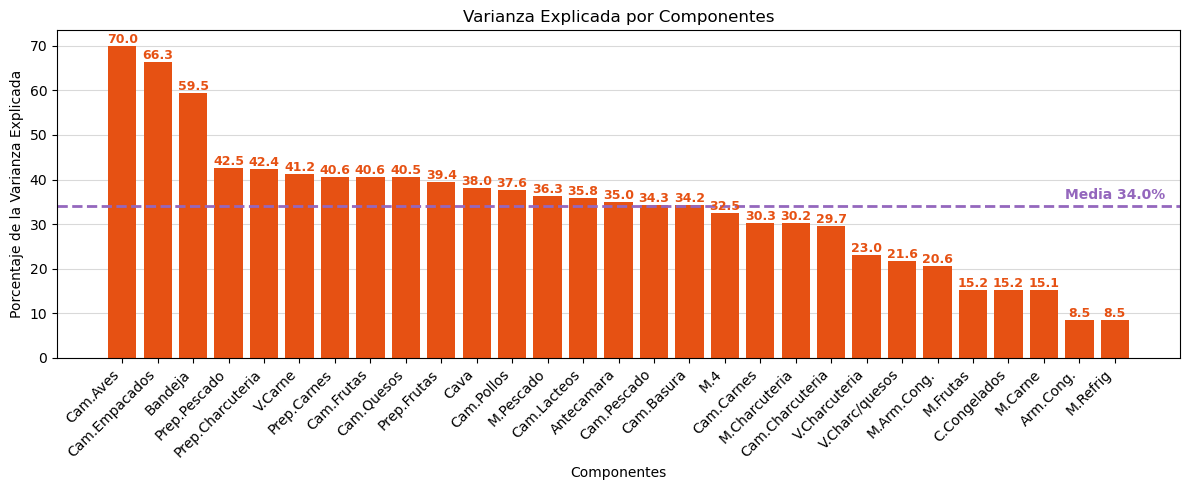

In [ ]:
#listas de datos de varianza explicada para cada componente
componentes = [
    "M.Frutas", "M.4", "M.Pescado", "M.Refrig", "M.Carne", "M.Charcuteria",
    "V.Carne", "V.Charcuteria", "V.Charc/quesos", "Cam.Frutas", "Prep.Frutas",
    "Cam.Basura", "Prep.Pescado", "Cam.Pescado", "Cam.Pollos", "Cam.Lacteos",
    "Antecamara", "Cam.Carnes", "Prep.Carnes", "Cam.Aves", "Cam.Empacados", "Cam.Quesos",
    "Cam.Charcuteria", "Prep.Charcuteria", "M.Arm.Cong.", "Arm.Cong.", "Bandeja",
    "Cava", "C.Congelados"
]
varianzas = [15.25, 32.51, 36.32, 8.46, 15.13, 30.17,
             41.18, 23.03, 21.63, 40.59, 39.40, 34.24,
             42.55, 34.34, 37.56, 35.79, 35.03, 30.34,
             40.60, 69.99, 66.29, 40.52, 29.66, 42.43, 
             20.56, 8.52, 59.53, 38.05, 15.17]

#media de varianza
media_varianza = np.mean(varianzas)

#lista de tuplas (varianza, componente) para ordenar
datos = list(zip(varianzas, componentes))
datos.sort(reverse=True)
varianzas_ordenadas, componentes_ordenados = zip(*datos)


#gráfico de barras
plt.figure(figsize=(12, 5))
barras = plt.bar(range(len(varianzas_ordenadas)), varianzas_ordenadas, color='#E65113')

plt.xticks(range(len(varianzas_ordenadas)), componentes_ordenados, rotation=45, ha='right')

plt.xlabel("Componentes")
plt.ylabel("Porcentaje de la Varianza Explicada")
plt.title("Varianza Explicada por Componentes")

#mostrar el valor encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura:.1f}',  
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 0), 
                 textcoords="offset points", color='#E65113',
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

#escribimos la media encima de una línea horizontal
plt.annotate('Media '+str(round(media_varianza,1))+'%',  xy=(28, 35), ha='center', va='bottom', fontsize=10, color='tab:purple',  fontweight='bold')
plt.axhline(y=media_varianza, color='tab:purple', linestyle='--', linewidth=2, label='Media')

plt.grid(axis='y', color='black', alpha=0.15)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

In [ ]:
print(df_train_pca.shape,df_test_pca.shape)

(41825, 29) (10457, 29)


Guardamos los datasets.

In [ ]:
df_train_pca.to_csv("C:\\Users\\User\\Desktop\\TFM\\df_train_refrigeradores.csv", index=False)
df_test_pca.to_csv("C:\\Users\\User\\Desktop\\TFM\\df_test_refrigeradores.csv", index=False)